In [1]:
import os
import pandas as pd
import numpy as np
import glob

desired_width = 320
pd.set_option('display.width', desired_width)
np.set_printoptions(linewidth=desired_width)
pd.set_option('display.max_columns', 10)

In [2]:
##############################################################################
# Load and clean Rating data                                                 #
##############################################################################
path = r'C:\Users\mbrag\PycharmProjects\RPIA-Capstone\Rating.csv'
df_ratings_raw = pd.read_csv(path)

# drop RatingSPOutlook,RatingSPOutlook columns
df_ratings_no_xtra_col = df_ratings_raw.drop(columns=['RatingSPOutlook', 'RatingSPOutlook.1'])

# drop NA from RatingSP column
df_ratings_clean = df_ratings_no_xtra_col.dropna(subset=['RatingSP'])

# calculate mean per security by removing KeyDate
df_ratings_clean = df_ratings_clean.drop(columns=['KeyDate'])
df_ratings_with_mean = df_ratings_clean.groupby(['SecurityID']).mean()
df_ratings_with_mean.reset_index()

,SecurityID,RatingSP
0,64,10.000000
1,72,13.000000
2,78,14.652361
3,82,15.000000
4,83,14.652361
...,...,...
17918,72406,14.000000
17919,72407,14.000000
17920,72504,17.000000
17921,72675,8.000000


In [3]:
##############################################################################
# Load and clean Spreads data                                                #
##############################################################################
path = r'C:\Users\mbrag\PycharmProjects\RPIA-Capstone\raw_data_files'
all_files = glob.glob(os.path.join(path, "*.csv"))  # use os.path.join to make concat OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
df_merged = pd.concat(df_from_each_file, ignore_index=True, sort=False)

In [4]:
# drop N/A from spreads data
df_merged = df_merged.dropna(how='any')
# convert dates to Date type
df_merged['KeyDate'] = pd.to_datetime(df_merged['KeyDate'], errors='coerce')

# Extract the low liers
dates_low_liers = df_merged["KeyDate"].value_counts()
dates_low_liers = dates_low_liers[dates_low_liers < 500]

# clean the dataset by removing the low liers and NaNs
df_merged_clean = df_merged[~df_merged['KeyDate'].isin(dates_low_liers.index)]

# drop rows after March 1st 2020
indexDates = df_merged_clean[ df_merged_clean['KeyDate'] > '2020-03-01' ].index
df_merged_clean.drop(indexDates , inplace=True)

# drop KeyDate column
#df_data_values = df_merged_clean.drop(columns=['KeyDate'])

# group by security and average all other columns
#df_data_values_with_mean = df_data_values.groupby(['SecurityID']).mean()
#df_data_values_with_mean.reset_index()

In [5]:
df_merged_clean.head(25)

,SecurityID,KeyDate,Price,YieldWorst,ModifiedDuration_Plain,...,AmtOutstanding,GSpread,OAS_Spread,ZSpread,AswUsd
0,64,2018-12-31,91.0976,6.49918,6.06004,...,1.697266e+09,389.13,345.604,385.493,357.653
1,64,2019-01-02,90.8950,6.53581,6.05466,...,1.697266e+09,399.42,351.010,390.586,361.970
2,64,2019-01-03,90.8199,6.55070,6.04601,...,1.697266e+09,409.20,365.010,405.634,375.736
3,64,2019-01-04,92.0500,6.33260,6.06068,...,1.697266e+09,381.59,329.922,371.585,346.809
4,64,2019-01-07,93.4350,6.09098,6.07716,...,1.697266e+09,347.39,300.014,344.978,324.979
5,64,2019-01-08,94.1644,5.96554,6.08450,...,1.697266e+09,331.30,281.457,328.040,310.566
6,64,2019-01-09,94.7400,5.86738,6.08968,...,1.697266e+09,323.50,270.271,318.174,302.289
7,64,2019-01-10,94.3312,5.93815,6.07661,...,1.697266e+09,327.72,278.369,324.706,307.612
8,64,2019-01-11,94.4928,5.91076,6.07625,...,1.697266e+09,329.24,278.423,325.285,308.512
9,64,2019-01-14,94.0064,5.99462,6.06718,...,1.697266e+09,337.70,287.512,332.855,314.662


In [6]:
##############################################################################
# Load and clean Securities meta data                                        #
##############################################################################
path = r'C:\Users\mbrag\PycharmProjects\RPIA-Capstone\SecurityData.csv'  # use your path
df_securities = pd.read_csv(path)

# filter out CountryDomicile=US
df_securities_US = df_securities.loc[df_securities['CountryDomicile'] == 'US']

##############################################################################
# Merge all the datasets into one DataFrame / File                           #
##############################################################################

# left join RatingSP from df_rating on df_securities and replace NA with zero
df_securities_US_w_avg_rating = df_securities_US.merge(df_ratings_with_mean, on=['SecurityID'], how='left')
df_securities_US_w_avg_rating['RatingSP'] = df_securities_US_w_avg_rating['RatingSP'].fillna(0)
df_securities_US_w_avg_rating.head(50)

,SecurityID,OfficialName,SecurityType,SecuritySubType,SecurityBBGType,...,AmountIssued,MinIncrement,MinPiece,BBGDescription,RatingSP
0,64,POST 5 08/15/26,Bond,Bond,PRIV PLACEMENT,...,1.750000e+09,1000.0,2000.0,NaN,10.000000
1,82,ATT 5.45 03/01/2047 Callable USD SENIOR_UNSECURED,Bond,Bond,GLOBAL,...,2.000000e+09,1000.0,2000.0,NaN,15.000000
2,83,AER 8.25 12/15/20,Bond,Bond,US DOMESTIC,...,1.000000e+09,1000.0,2000.0,NaN,14.652361
3,87,CNHI 4.375 04/05/22,Bond,Bond,US DOMESTIC,...,5.000000e+08,1000.0,2000.0,NaN,15.000000
4,95,LPLA 5.75 09/15/2025 USD 144A,Bond,Bond,PRIV PLACEMENT,...,9.000000e+08,1000.0,2000.0,NaN,11.785088
5,109,ATT 4.25 03/01/27,Bond,Bond,GLOBAL,...,2.000000e+09,1000.0,2000.0,NaN,15.000000
6,110,FTR 10.5 09/15/22,Bond,Bond,GLOBAL,...,2.183426e+09,1000.0,2000.0,ISS'D IN EXCH OF 144A/REGS SEC; SEE CUSIP 3590...,4.819742
7,121,AER 4.625 04/15/2021 USD,Bond,Bond,GLOBAL,...,5.000000e+08,1000.0,2000.0,NaN,14.652361
8,126,BKNG 2.15 11/25/22,Bond,Bond,EURO NON-DOLLAR,...,7.500000e+08,1000.0,100000.0,NaN,0.000000
9,130,BGCP 5.125 05/27/2021 Bullet USD SENIOR_UNSECURED,Bond,Bond,GLOBAL,...,2.850000e+08,1000.0,2000.0,ISS'D IN EXCH OF 144A/REGS SEC; SEE CUSIP 0554...,14.000000


In [7]:
# left join all columns by SecurityID from df_avg_data_values into df_securities_US_w_avg_rating
df_securities_US_w_data = df_merged_clean.merge(df_securities_US_w_avg_rating, on=['SecurityID'], how='left')

# drop rows from df_securities_US_w_data without average spreads
df_securities_US_w_data_clean = df_securities_US_w_data.dropna(subset=['Price', 'YieldWorst', 'ModifiedDuration_Plain',
                                                                       'AmtOutstanding', 'GSpread', 'OAS_Spread', 
                                                                       'ZSpread', 'AswUsd', 'CountryDomicile'])

# TEMP - output df_securities to US_Securities_with_AVG_Rating_AVG_Spreads.csv
#df_securities_US_w_data_clean.to_csv(r'C:\Users\mbrag\PycharmProjects\RPIA-Capstone\US_Securities_with_AVG_Rating_AVG_Spreads.csv')

#df_US_spreads = df_merged_clean.loc[df_merged_clean['CountryDomicile'] == 'US']

In [8]:
df_securities_US_w_data_clean.head(50)

,SecurityID,KeyDate,Price,YieldWorst,ModifiedDuration_Plain,...,AmountIssued,MinIncrement,MinPiece,BBGDescription,RatingSP
0,64,2018-12-31,91.0976,6.49918,6.06004,...,1.750000e+09,1000.0,2000.0,NaN,10.0
1,64,2019-01-02,90.8950,6.53581,6.05466,...,1.750000e+09,1000.0,2000.0,NaN,10.0
2,64,2019-01-03,90.8199,6.55070,6.04601,...,1.750000e+09,1000.0,2000.0,NaN,10.0
3,64,2019-01-04,92.0500,6.33260,6.06068,...,1.750000e+09,1000.0,2000.0,NaN,10.0
4,64,2019-01-07,93.4350,6.09098,6.07716,...,1.750000e+09,1000.0,2000.0,NaN,10.0
5,64,2019-01-08,94.1644,5.96554,6.08450,...,1.750000e+09,1000.0,2000.0,NaN,10.0
6,64,2019-01-09,94.7400,5.86738,6.08968,...,1.750000e+09,1000.0,2000.0,NaN,10.0
7,64,2019-01-10,94.3312,5.93815,6.07661,...,1.750000e+09,1000.0,2000.0,NaN,10.0
8,64,2019-01-11,94.4928,5.91076,6.07625,...,1.750000e+09,1000.0,2000.0,NaN,10.0
9,64,2019-01-14,94.0064,5.99462,6.06718,...,1.750000e+09,1000.0,2000.0,NaN,10.0


In [9]:
df_securities_US_w_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2785579 entries, 0 to 4429433
Data columns (total 59 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   SecurityID              int64         
 1   KeyDate                 datetime64[ns]
 2   Price                   float64       
 3   YieldWorst              float64       
 4   ModifiedDuration_Plain  float64       
 5   WorkoutDate             object        
 6   AmtOutstanding          float64       
 7   GSpread                 float64       
 8   OAS_Spread              float64       
 9   ZSpread                 float64       
 10  AswUsd                  float64       
 11  OfficialName            object        
 12  SecurityType            object        
 13  SecuritySubType         object        
 14  SecurityBBGType         object        
 15  SecurityBBGYellowKey    object        
 16  Series                  object        
 17  SecuritySector          object        
 18  Se

In [10]:
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools
from scipy.spatial.distance import cdist

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from time import time

%matplotlib inline

In [11]:
df_all = df_securities_US_w_data_clean[['SecurityID', 'KeyDate', 'GSpread', 'Price']]
df_all.head(25)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2785579 entries, 0 to 4429433
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   SecurityID  int64         
 1   KeyDate     datetime64[ns]
 2   GSpread     float64       
 3   Price       float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 106.3 MB


In [12]:
path_clusters = r'C:\Users\mbrag\PycharmProjects\RPIA-Capstone\df_test.csv'  # use your path
df_clusters = pd.read_csv(path_clusters)

# left join all columns by SecurityID from df_avg_data_values into df_securities_US_w_avg_rating
df_all = df_all.merge(df_clusters[['SecurityID','ClusterTag']], on=['SecurityID'], how='left')

In [13]:
df_all.head()

,SecurityID,KeyDate,GSpread,Price,ClusterTag
0,64,2018-12-31,389.13,91.0976,1
1,64,2019-01-02,399.42,90.8950,1
2,64,2019-01-03,409.20,90.8199,1
3,64,2019-01-04,381.59,92.0500,1
4,64,2019-01-07,347.39,93.4350,1


In [14]:
df_all = df_all.set_index(['KeyDate'])
df_all.head(50)

,SecurityID,GSpread,Price,ClusterTag
KeyDate,,,,
2018-12-31,64,389.13,91.0976,1
2019-01-02,64,399.42,90.8950,1
2019-01-03,64,409.20,90.8199,1
2019-01-04,64,381.59,92.0500,1
2019-01-07,64,347.39,93.4350,1
2019-01-08,64,331.30,94.1644,1
2019-01-09,64,323.50,94.7400,1
2019-01-10,64,327.72,94.3312,1
2019-01-11,64,329.24,94.4928,1


C:\Users\mbrag\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:xlabel='KeyDate'>

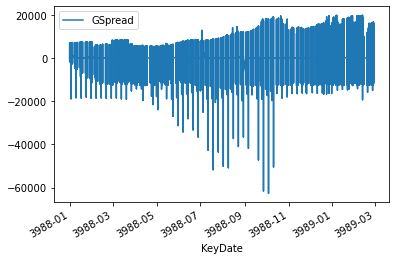

In [15]:
df_all_GS = df_all[['GSpread']]
df_all_GS.plot()

In [16]:
df_all.head()

,SecurityID,GSpread,Price,ClusterTag
KeyDate,,,,
2018-12-31,64,389.13,91.0976,1
2019-01-02,64,399.42,90.8950,1
2019-01-03,64,409.20,90.8199,1
2019-01-04,64,381.59,92.0500,1
2019-01-07,64,347.39,93.4350,1


# Plotting Clusters

In [17]:
unique_clusters = set(df_all['ClusterTag'])
print(unique_clusters)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [18]:
dfs_by_cluster = []

for cluster in unique_clusters:
    dfs_by_cluster.append(df_all.loc[df_all['ClusterTag'] == cluster])
    
print(dfs_by_cluster)

[            SecurityID     GSpread    Price  ClusterTag
KeyDate                                                
2018-12-31          87  177.080000  100.435           0
2019-01-02          87  176.290000  100.540           0
2019-01-03          87  184.640000  100.570           0
2019-01-04          87  174.040000  100.728           0
2019-01-07          87  168.460000  100.502           0
...                ...         ...      ...         ...
2020-02-24       69115  128.376628  111.662           0
2020-02-25       69115  138.281030  111.037           0
2020-02-26       69115  141.577796  110.874           0
2020-02-27       69115  151.623229  110.791           0
2020-02-28       69115  155.724738  111.230           0

[803195 rows x 4 columns],             SecurityID     GSpread     Price  ClusterTag
KeyDate                                                 
2018-12-31          64  389.130000   91.0976           1
2019-01-02          64  399.420000   90.8950           1
2019-01-03     

## Cluster 0 - With and without outliers

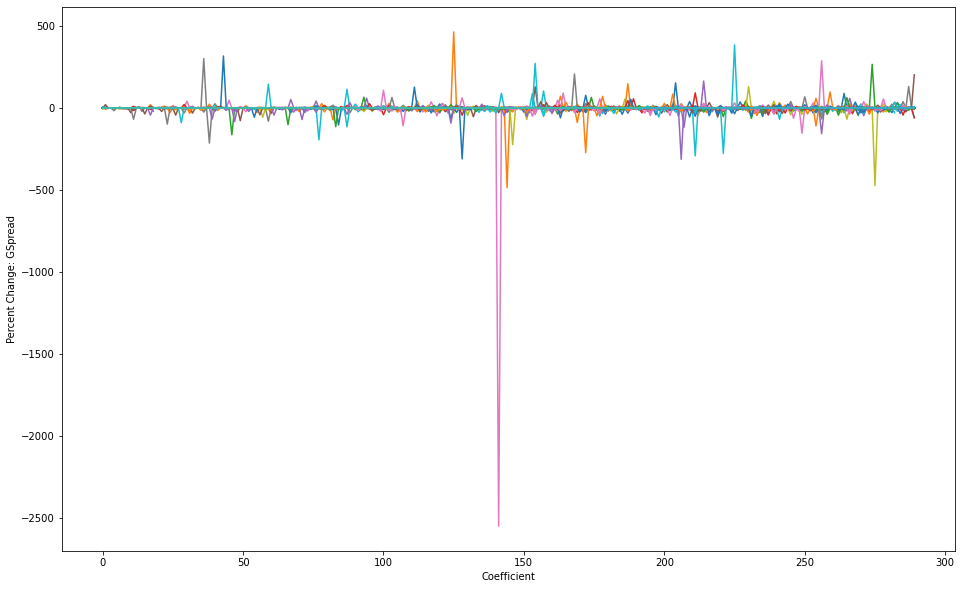

In [59]:
import pywt
from matplotlib.pyplot import figure

cluster_0 = dfs_by_cluster[0]
all_securities = set(cluster_0['SecurityID'])

for s in all_securities:
    try:
        data = df_all[df_all['SecurityID'] == s].GSpread.pct_change().dropna().values
        coeffs = pywt.wavedec(data, 'db1', level=0)
        plt.plot(coeffs[0])
    except:
        pass
    
plt.rcParams["figure.figsize"] = (16,10)
plt.xlabel('Coefficient')
plt.ylabel('Percent Change: GSpread')
plt.show()


In [55]:
cluster_outlier = float(input('Please enter a top percent change absolute value:  '))

Please enter a top percent change absolute value:  299


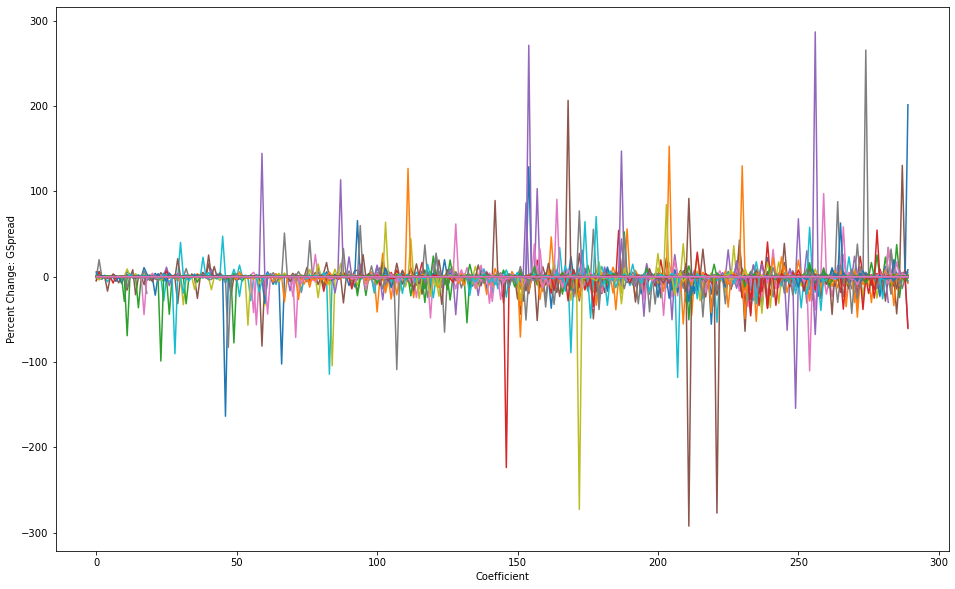

Removed Securities [33095, 33165, 43554, 52596, 45391, 15339, 48309, 48310, 7516] out of total 3360


In [60]:
import pywt
from matplotlib.pyplot import figure

cluster_0 = dfs_by_cluster[0]
all_securities = set(cluster_0['SecurityID'])
sec_removed = []

for s in all_securities:
    try:
        data = df_all[df_all['SecurityID'] == s].GSpread.pct_change().dropna().values

        if (max(abs(data)) > cluster_outlier):
            sec_removed.append(s)
            continue
        else:
            pass

        coeffs = pywt.wavedec(data, 'db1', level=0)
        plt.plot(coeffs[0])
    except:
        pass
    
plt.rcParams["figure.figsize"] = (16,10)
plt.xlabel('Coefficient')
plt.ylabel('Percent Change: GSpread')
plt.show()
print(f'Removed Securities {sec_removed}({len(sec_removed)}) out of total {len(all_securities)}')

## Cluster 1 - With and without outliers

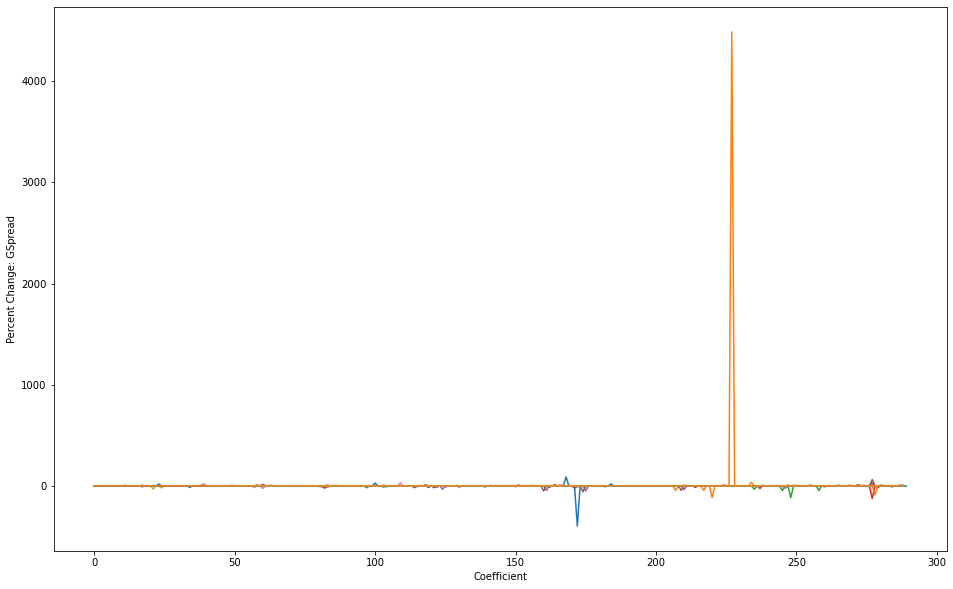

In [61]:
import pywt
from matplotlib.pyplot import figure

cluster_1 = dfs_by_cluster[1]
all_securities = set(cluster_1['SecurityID'])

for s in all_securities:
    try:
        data = df_all[df_all['SecurityID'] == s].GSpread.pct_change().dropna().values
        coeffs = pywt.wavedec(data, 'db1', level=0)
        plt.plot(coeffs[0])
    except:
        pass
    
plt.rcParams["figure.figsize"] = (16,10)
plt.xlabel('Coefficient')
plt.ylabel('Percent Change: GSpread')
plt.show()

In [84]:
cluster_outlier = float(input('Please enter a top percent change absolute value:  '))

Please enter a top percent change absolute value:  7


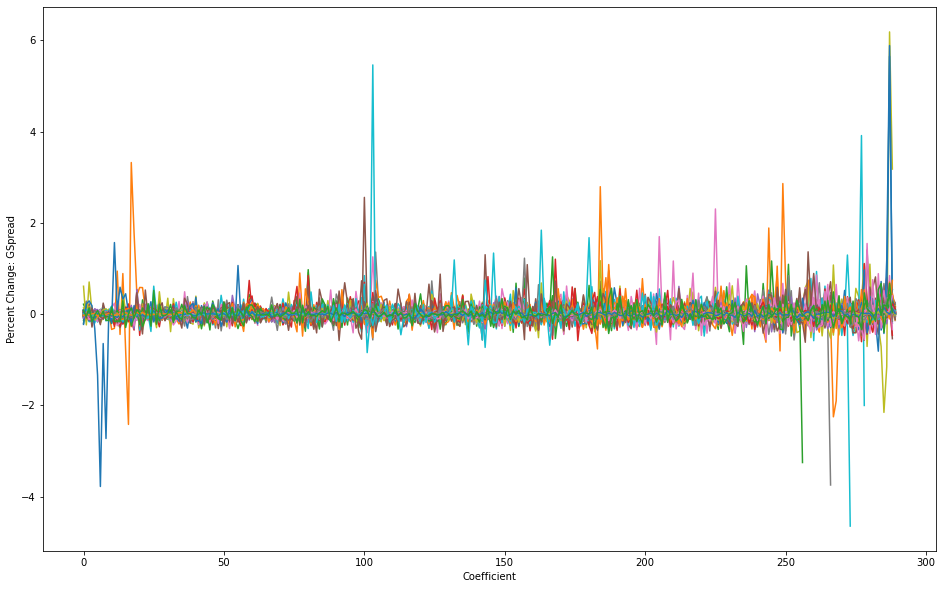

Removed Securities [49247, 8569, 18915, 6677, 33407, 19133, 39662, 33553, 6953, 21395, 9115, 54211, 56306, 33906, 21658, 46425, 11685, 11686, 19910](19) out of total 462


In [85]:
import pywt
from matplotlib.pyplot import figure

cluster_1 = dfs_by_cluster[1]
all_securities = set(cluster_1['SecurityID'])
sec_removed = []

for s in all_securities:
    try:
        data = df_all[df_all['SecurityID'] == s].GSpread.pct_change().dropna().values

        if (max(abs(data)) > cluster_outlier):
            sec_removed.append(s)
            continue
        else:
            pass

        coeffs = pywt.wavedec(data, 'db1', level=0)
        plt.plot(coeffs[0])
    except:
        pass
    
plt.rcParams["figure.figsize"] = (16,10)
plt.xlabel('Coefficient')
plt.ylabel('Percent Change: GSpread')
plt.show()
print(f'Removed Securities {sec_removed}({len(sec_removed)}) out of total {len(all_securities)}')

## Cluster 2 - With and without outliers

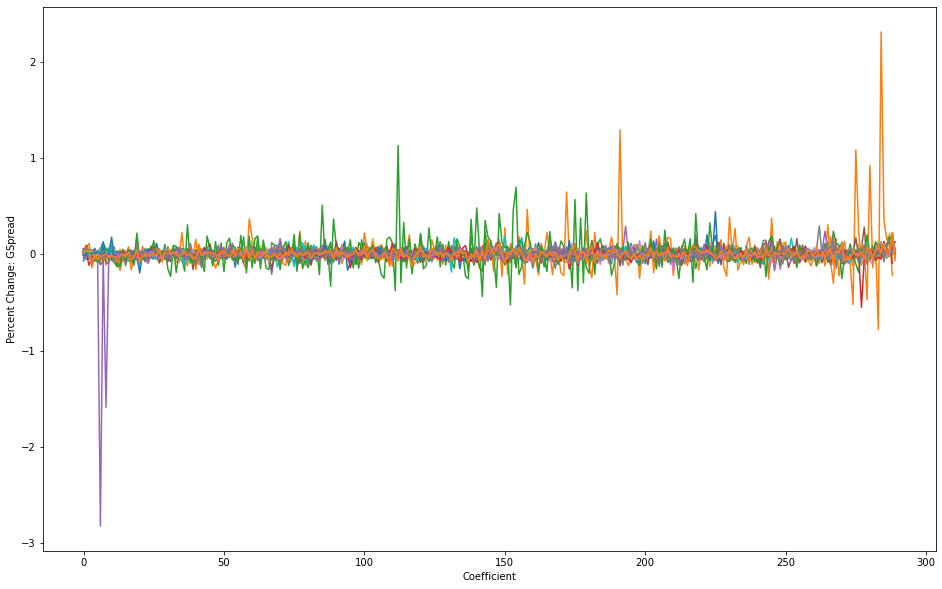

In [86]:
import pywt
from matplotlib.pyplot import figure

cluster_2 = dfs_by_cluster[2]
all_securities = set(cluster_2['SecurityID'])

for s in all_securities:
    try:
        data = df_all[df_all['SecurityID'] == s].GSpread.pct_change().dropna().values
        coeffs = pywt.wavedec(data, 'db1', level=0)
        plt.plot(coeffs[0])
    except:
        pass
    
plt.rcParams["figure.figsize"] = (16,10)
plt.xlabel('Coefficient')
plt.ylabel('Percent Change: GSpread')
plt.show()

In [87]:
cluster_outlier = float(input('Please enter a top percent change absolute value:  '))

Please enter a top percent change absolute value:  1


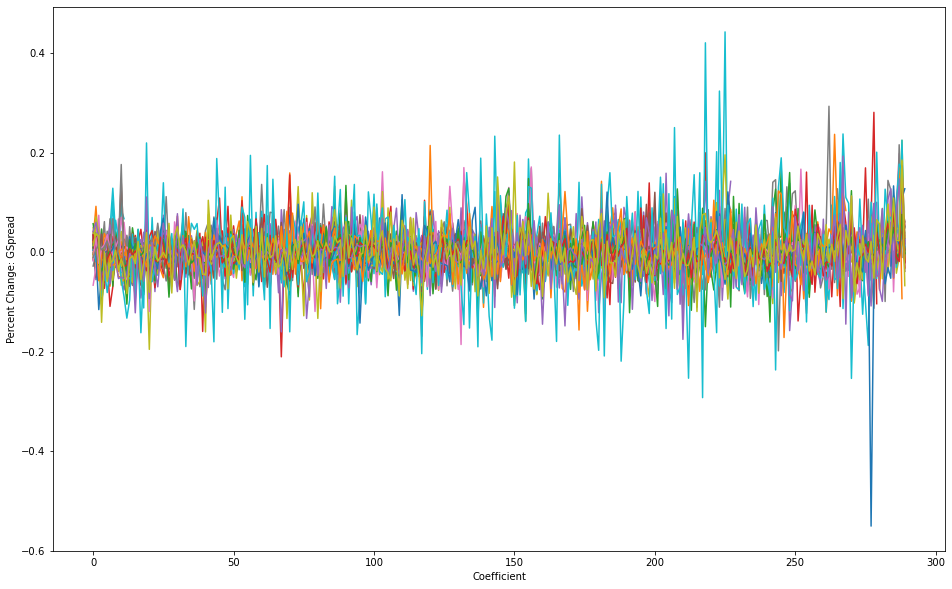

Removed Securities [15435, 6361, 43383](3) out of total 82


In [88]:
import pywt
from matplotlib.pyplot import figure

cluster_2 = dfs_by_cluster[2]
all_securities = set(cluster_2['SecurityID'])
sec_removed = []

for s in all_securities:
    try:
        data = df_all[df_all['SecurityID'] == s].GSpread.pct_change().dropna().values

        if (max(abs(data)) > cluster_outlier):
            sec_removed.append(s)
            continue
        else:
            pass

        coeffs = pywt.wavedec(data, 'db1', level=0)
        plt.plot(coeffs[0])
    except:
        pass
    
plt.rcParams["figure.figsize"] = (16,10)
plt.xlabel('Coefficient')
plt.ylabel('Percent Change: GSpread')
plt.show()
print(f'Removed Securities {sec_removed}({len(sec_removed)}) out of total {len(all_securities)}')

# Cluster 3 - With and without outliers

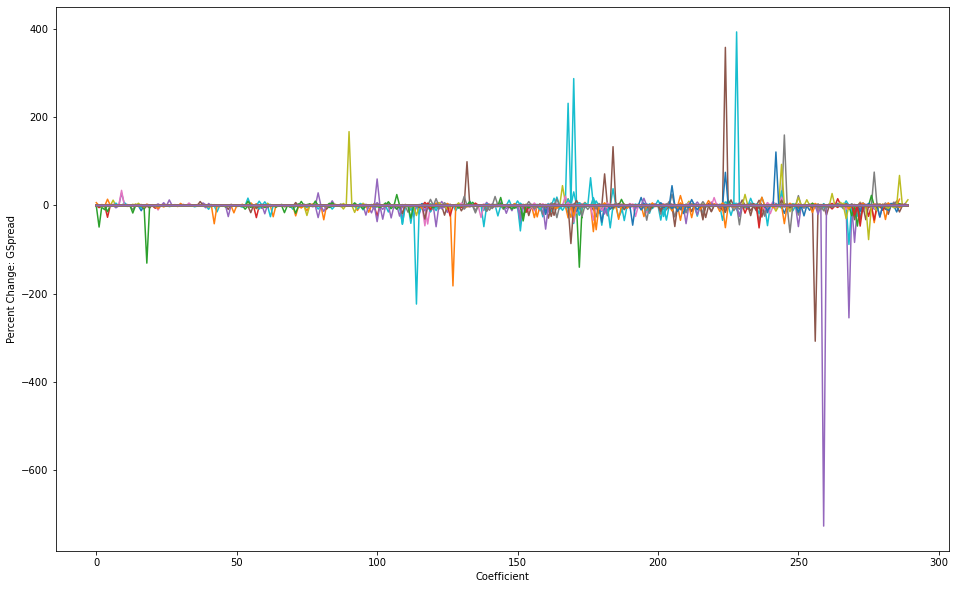

In [89]:
import pywt
from matplotlib.pyplot import figure

cluster_3 = dfs_by_cluster[3]
all_securities = set(cluster_3['SecurityID'])

for s in all_securities:
    try:
        data = df_all[df_all['SecurityID'] == s].GSpread.pct_change().dropna().values
        coeffs = pywt.wavedec(data, 'db1', level=0)
        plt.plot(coeffs[0])
    except:
        pass
    
plt.rcParams["figure.figsize"] = (16,10)
plt.xlabel('Coefficient')
plt.ylabel('Percent Change: GSpread')
plt.show()

In [92]:
cluster_outlier = float(input('Please enter a top percent change absolute value:  '))

Please enter a top percent change absolute value:  75


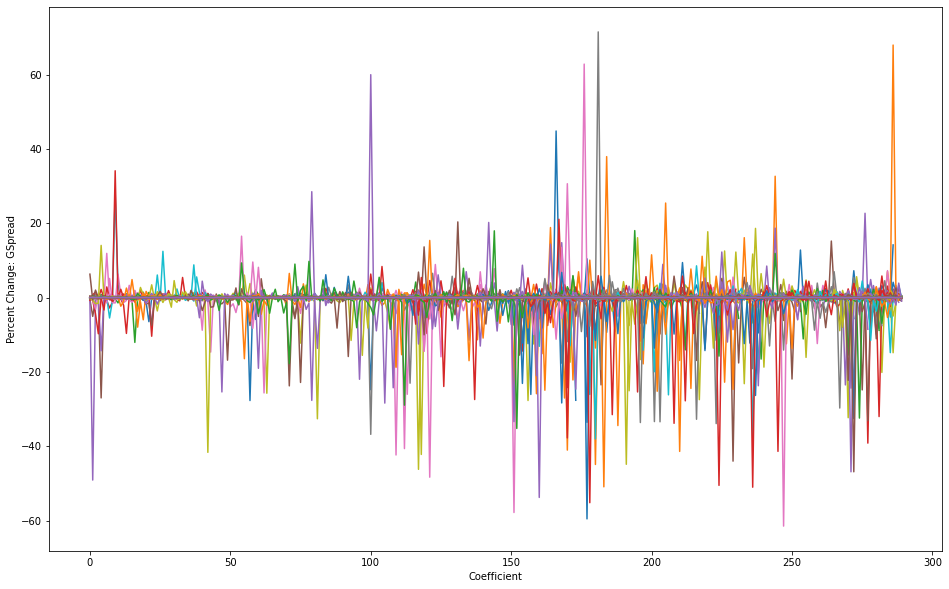

Removed Securities [8445, 33212, 8795, 8858, 8894, 33908, 9345, 50474, 11398, 3282, 11668, 52744, 21425, 47490, 39372, 39692, 15466, 48259, 48322, 48375](20) out of total 1285


In [93]:
import pywt
from matplotlib.pyplot import figure

cluster_3 = dfs_by_cluster[3]
all_securities = set(cluster_3['SecurityID'])
sec_removed = []

for s in all_securities:
    try:
        data = df_all[df_all['SecurityID'] == s].GSpread.pct_change().dropna().values

        if (max(abs(data)) > cluster_outlier):
            sec_removed.append(s)
            continue
        else:
            pass

        coeffs = pywt.wavedec(data, 'db1', level=0)
        plt.plot(coeffs[0])
    except:
        pass
    
plt.rcParams["figure.figsize"] = (16,10)
plt.xlabel('Coefficient')
plt.ylabel('Percent Change: GSpread')
plt.show()
print(f'Removed Securities {sec_removed}({len(sec_removed)}) out of total {len(all_securities)}')

# Cluster 4 - With and without outliers

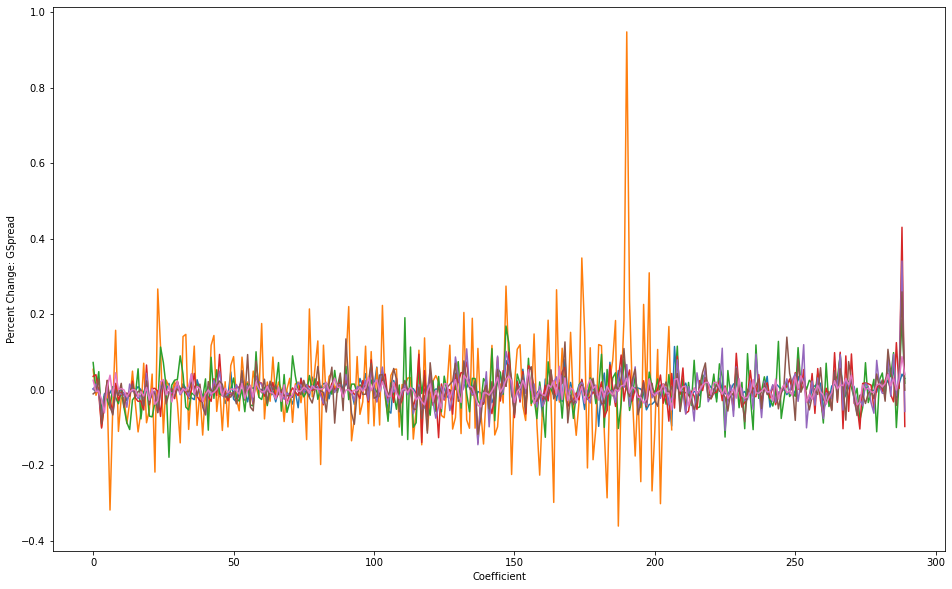

In [94]:
import pywt
from matplotlib.pyplot import figure

cluster_4 = dfs_by_cluster[4]
all_securities = set(cluster_4['SecurityID'])

for s in all_securities:
    try:
        data = df_all[df_all['SecurityID'] == s].GSpread.pct_change().dropna().values
        coeffs = pywt.wavedec(data, 'db1', level=0)
        plt.plot(coeffs[0])
    except:
        pass
    
plt.rcParams["figure.figsize"] = (16,10)
plt.xlabel('Coefficient')
plt.ylabel('Percent Change: GSpread')
plt.show()

In [95]:
cluster_outlier = float(input('Please enter a top percent change absolute value:  '))

Please enter a top percent change absolute value:  0.4


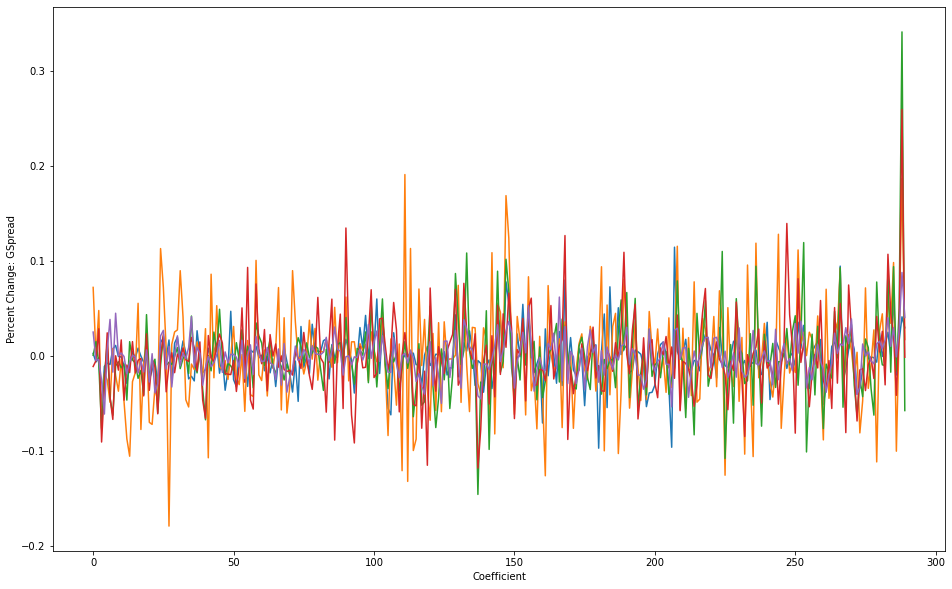

Removed Securities [7400, 46921](2) out of total 7


In [96]:
import pywt
from matplotlib.pyplot import figure

cluster_4 = dfs_by_cluster[4]
all_securities = set(cluster_4['SecurityID'])
sec_removed = []

for s in all_securities:
    try:
        data = df_all[df_all['SecurityID'] == s].GSpread.pct_change().dropna().values

        if (max(abs(data)) > cluster_outlier):
            sec_removed.append(s)
            continue
        else:
            pass

        coeffs = pywt.wavedec(data, 'db1', level=0)
        plt.plot(coeffs[0])
    except:
        pass
    
plt.rcParams["figure.figsize"] = (16,10)
plt.xlabel('Coefficient')
plt.ylabel('Percent Change: GSpread')
plt.show()
print(f'Removed Securities {sec_removed}({len(sec_removed)}) out of total {len(all_securities)}')

# Cluster 5 - With and without outliers

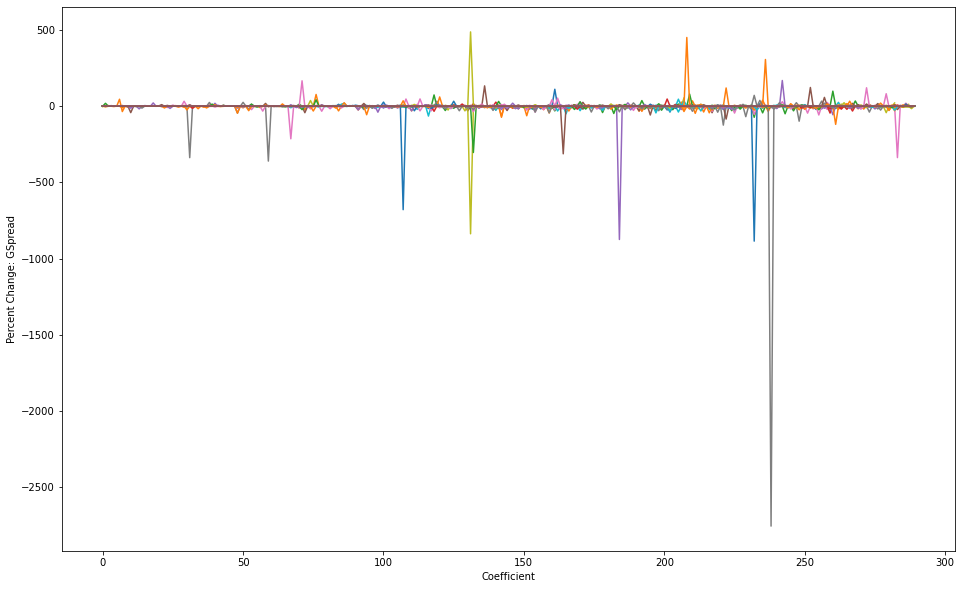

In [100]:
import pywt
from matplotlib.pyplot import figure

cluster_5 = dfs_by_cluster[5]
all_securities = set(cluster_5['SecurityID'])

for s in all_securities:
    try:
        data = df_all[df_all['SecurityID'] == s].GSpread.pct_change().dropna().values
        coeffs = pywt.wavedec(data, 'db1', level=0)
        plt.plot(coeffs[0])
    except:
        pass
    
plt.rcParams["figure.figsize"] = (16,10)
plt.xlabel('Coefficient')
plt.ylabel('Percent Change: GSpread')
plt.show()

In [101]:
cluster_outlier = float(input('Please enter a top percent change absolute value:  '))

Please enter a top percent change absolute value:  100


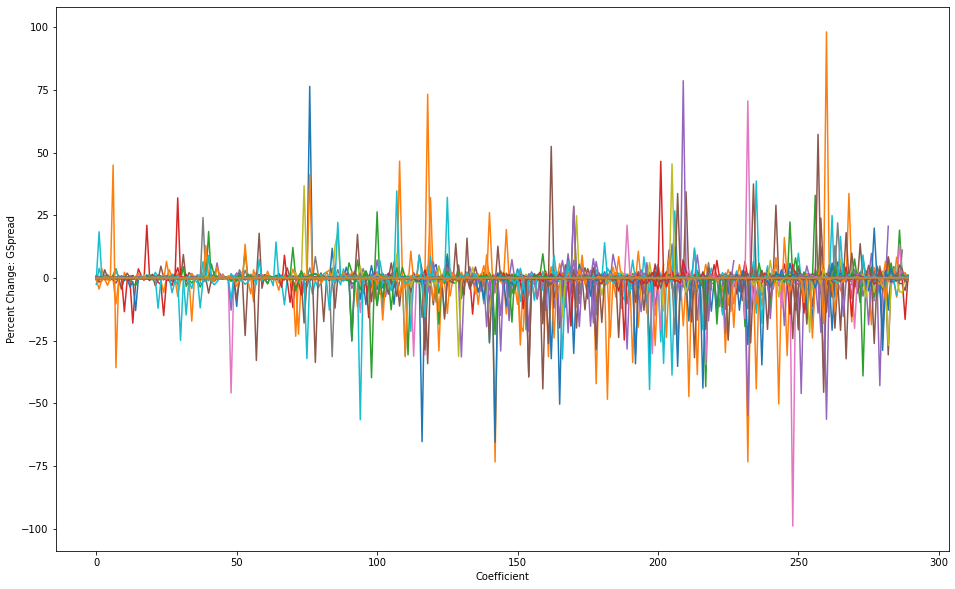

Removed Securities [33221, 17460, 50445, 9544, 34550, 18550, 51390, 43425, 51928, 3067, 21158, 45824, 54246, 46107, 5327, 46667, 46740, 22471, 47187, 56283, 48427, 57207, 32700](23) out of total 2246


In [102]:
import pywt
from matplotlib.pyplot import figure

cluster_5 = dfs_by_cluster[5]
all_securities = set(cluster_5['SecurityID'])
sec_removed = []

for s in all_securities:
    try:
        data = df_all[df_all['SecurityID'] == s].GSpread.pct_change().dropna().values

        if (max(abs(data)) > cluster_outlier):
            sec_removed.append(s)
            continue
        else:
            pass

        coeffs = pywt.wavedec(data, 'db1', level=0)
        plt.plot(coeffs[0])
    except:
        pass
    
plt.rcParams["figure.figsize"] = (16,10)
plt.xlabel('Coefficient')
plt.ylabel('Percent Change: GSpread')
plt.show()
print(f'Removed Securities {sec_removed}({len(sec_removed)}) out of total {len(all_securities)}')

# Cluster 6 - With and without outliers

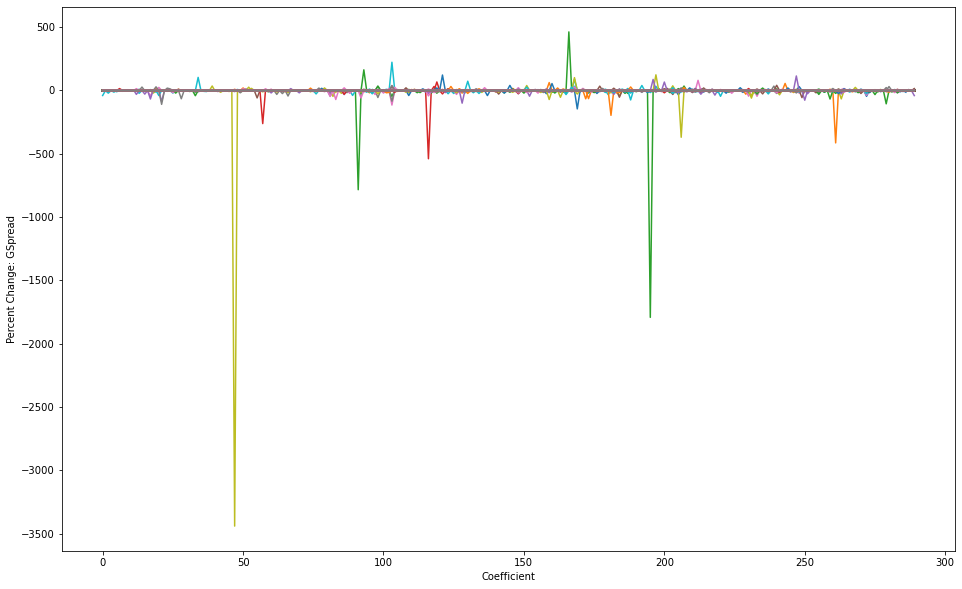

In [103]:
import pywt
from matplotlib.pyplot import figure

cluster_6 = dfs_by_cluster[6]
all_securities = set(cluster_6['SecurityID'])

for s in all_securities:
    try:
        data = df_all[df_all['SecurityID'] == s].GSpread.pct_change().dropna().values
        coeffs = pywt.wavedec(data, 'db1', level=0)
        plt.plot(coeffs[0])
    except:
        pass
    
plt.rcParams["figure.figsize"] = (16,10)
plt.xlabel('Coefficient')
plt.ylabel('Percent Change: GSpread')
plt.show()

In [106]:
cluster_outlier = float(input('Please enter a top percent change absolute value:  '))

Please enter a top percent change absolute value:  50


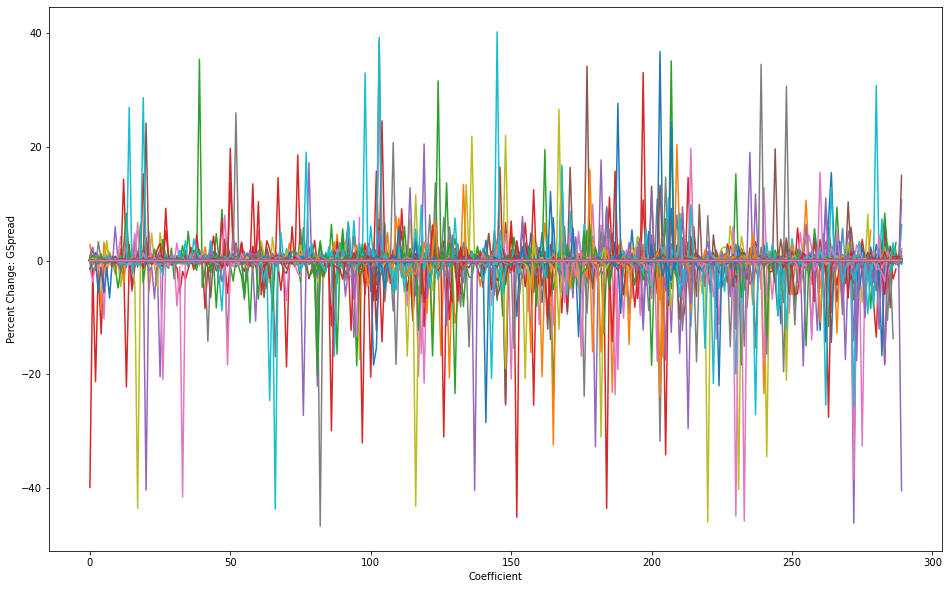

Removed Securities [32910, 17004, 49790, 50606, 50607, 9228, 42291, 34747, 34876, 43529, 10882, 60272, 2957, 43964, 52191, 3126, 52663, 44655, 52851, 20164, 12021, 29066, 53671, 29115, 62097, 45798, 46191, 29859, 5730, 46950, 30648, 39324, 47542, 39465, 48167, 23622, 23748, 40207, 48461](39) out of total 3038


In [107]:
import pywt
from matplotlib.pyplot import figure

cluster_6 = dfs_by_cluster[6]
all_securities = set(cluster_6['SecurityID'])
sec_removed = []

for s in all_securities:
    try:
        data = df_all[df_all['SecurityID'] == s].GSpread.pct_change().dropna().values

        if (max(abs(data)) > cluster_outlier):
            sec_removed.append(s)
            continue
        else:
            pass

        coeffs = pywt.wavedec(data, 'db1', level=0)
        plt.plot(coeffs[0])
    except:
        pass
    
plt.rcParams["figure.figsize"] = (16,10)
plt.xlabel('Coefficient')
plt.ylabel('Percent Change: GSpread')
plt.show()
print(f'Removed Securities {sec_removed}({len(sec_removed)}) out of total {len(all_securities)}')

# Cluster 7 - With and without outliers

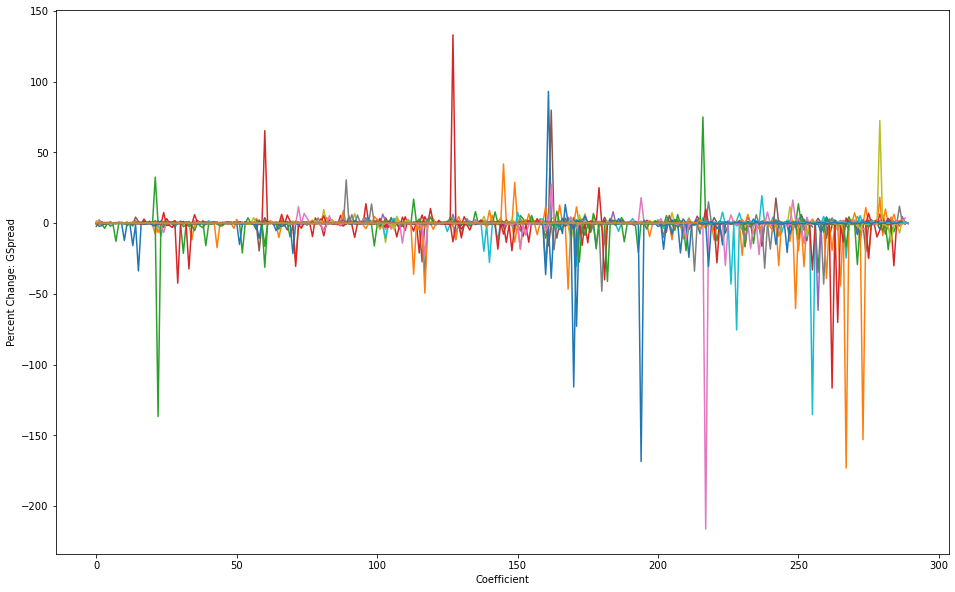

In [113]:
import pywt
from matplotlib.pyplot import figure

cluster_7 = dfs_by_cluster[7]
all_securities = set(cluster_7['SecurityID'])

for s in all_securities:
    try:
        data = df_all[df_all['SecurityID'] == s].GSpread.pct_change().dropna().values
        coeffs = pywt.wavedec(data, 'db1', level=0)
        plt.plot(coeffs[0])
    except:
        pass
    
plt.rcParams["figure.figsize"] = (16,10)
plt.xlabel('Coefficient')
plt.ylabel('Percent Change: GSpread')
plt.show()

In [114]:
cluster_outlier = float(input('Please enter a top percent change absolute value:  '))

Please enter a top percent change absolute value:  25


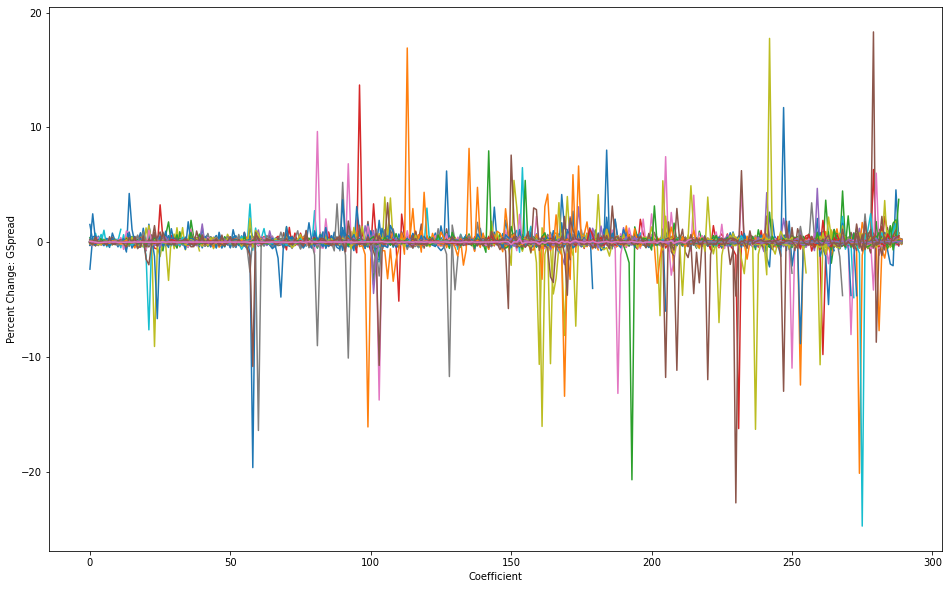

Removed Securities [43174, 6402, 349, 18789, 18934, 14896, 14897, 6737, 17002, 19138, 39659, 19190, 11039, 45874, 64329, 21472, 7184, 15414, 17463, 33904, 15565, 13591, 40299, 11667, 48687, 40520, 7914, 50928, 50930, 34548, 5940, 3912, 51057, 2038](34) out of total 902


In [115]:
import pywt
from matplotlib.pyplot import figure

cluster_7 = dfs_by_cluster[7]
all_securities = set(cluster_7['SecurityID'])
sec_removed = []

for s in all_securities:
    try:
        data = df_all[df_all['SecurityID'] == s].GSpread.pct_change().dropna().values

        if (max(abs(data)) > cluster_outlier):
            sec_removed.append(s)
            continue
        else:
            pass

        coeffs = pywt.wavedec(data, 'db1', level=0)
        plt.plot(coeffs[0])
    except:
        pass
    
plt.rcParams["figure.figsize"] = (16,10)
plt.xlabel('Coefficient')
plt.ylabel('Percent Change: GSpread')
plt.show()
print(f'Removed Securities {sec_removed}({len(sec_removed)}) out of total {len(all_securities)}')

# Cluster 8 - With and without outliers

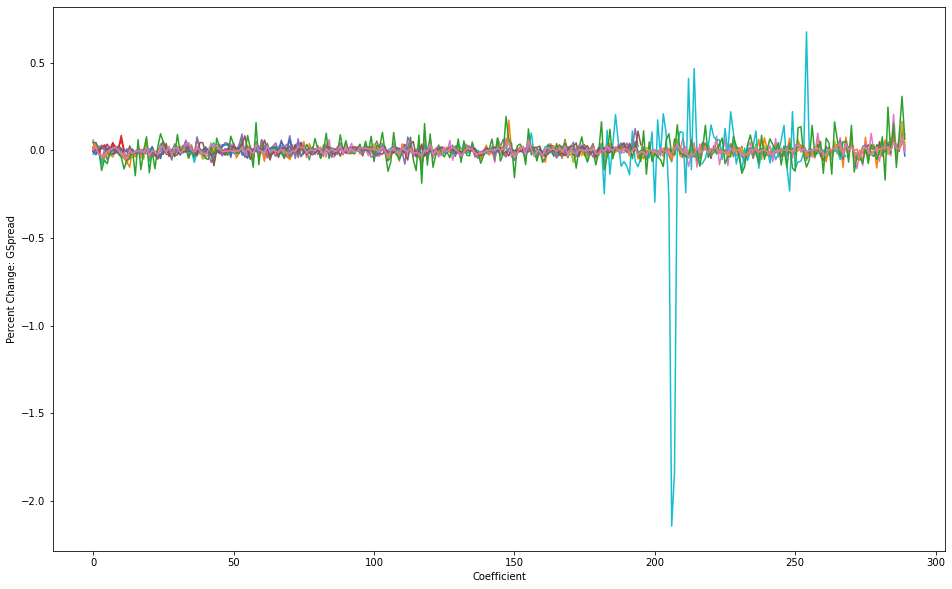

In [116]:
import pywt
from matplotlib.pyplot import figure

cluster_8 = dfs_by_cluster[8]
all_securities = set(cluster_8['SecurityID'])

for s in all_securities:
    try:
        data = df_all[df_all['SecurityID'] == s].GSpread.pct_change().dropna().values
        coeffs = pywt.wavedec(data, 'db1', level=0)
        plt.plot(coeffs[0])
    except:
        pass
    
plt.rcParams["figure.figsize"] = (16,10)
plt.xlabel('Coefficient')
plt.ylabel('Percent Change: GSpread')
plt.show()

In [119]:
cluster_outlier = float(input('Please enter a top percent change absolute value:  '))

Please enter a top percent change absolute value:  0.2


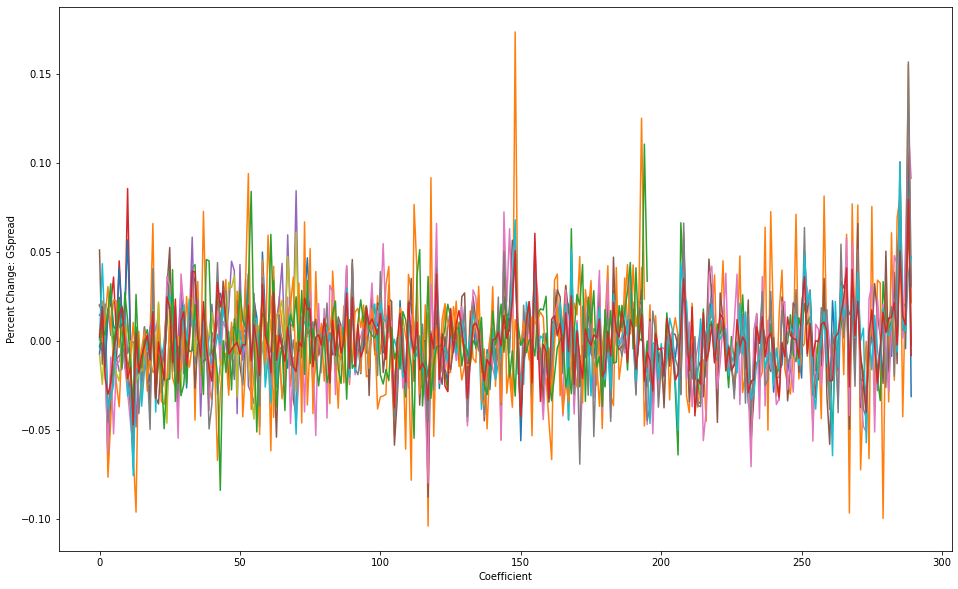

Removed Securities [23533, 1873, 5075](3) out of total 17


In [120]:
import pywt
from matplotlib.pyplot import figure

cluster_8 = dfs_by_cluster[8]
all_securities = set(cluster_8['SecurityID'])
sec_removed = []

for s in all_securities:
    try:
        data = df_all[df_all['SecurityID'] == s].GSpread.pct_change().dropna().values

        if (max(abs(data)) > cluster_outlier):
            sec_removed.append(s)
            continue
        else:
            pass

        coeffs = pywt.wavedec(data, 'db1', level=0)
        plt.plot(coeffs[0])
    except:
        pass
    
plt.rcParams["figure.figsize"] = (16,10)
plt.xlabel('Coefficient')
plt.ylabel('Percent Change: GSpread')
plt.show()
print(f'Removed Securities {sec_removed}({len(sec_removed)}) out of total {len(all_securities)}')

# Cluster 9 - With and without outliers

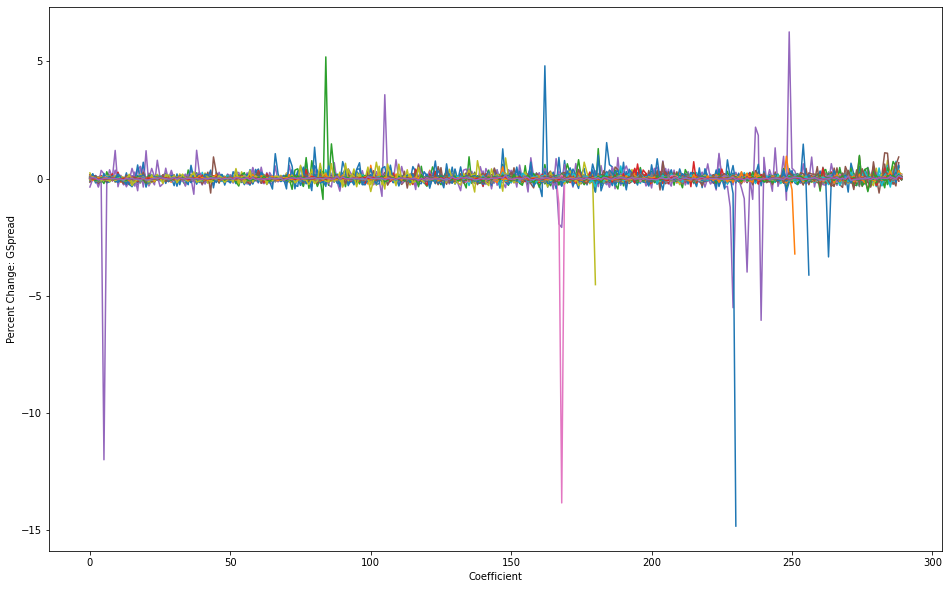

In [121]:
import pywt
from matplotlib.pyplot import figure

cluster_9 = dfs_by_cluster[9]
all_securities = set(cluster_9['SecurityID'])

for s in all_securities:
    try:
        data = df_all[df_all['SecurityID'] == s].GSpread.pct_change().dropna().values
        coeffs = pywt.wavedec(data, 'db1', level=0)
        plt.plot(coeffs[0])
    except:
        pass
    
plt.rcParams["figure.figsize"] = (16,10)
plt.xlabel('Coefficient')
plt.ylabel('Percent Change: GSpread')
plt.show()

In [125]:
cluster_outlier = float(input('Please enter a top percent change absolute value:  '))

Please enter a top percent change absolute value:  1


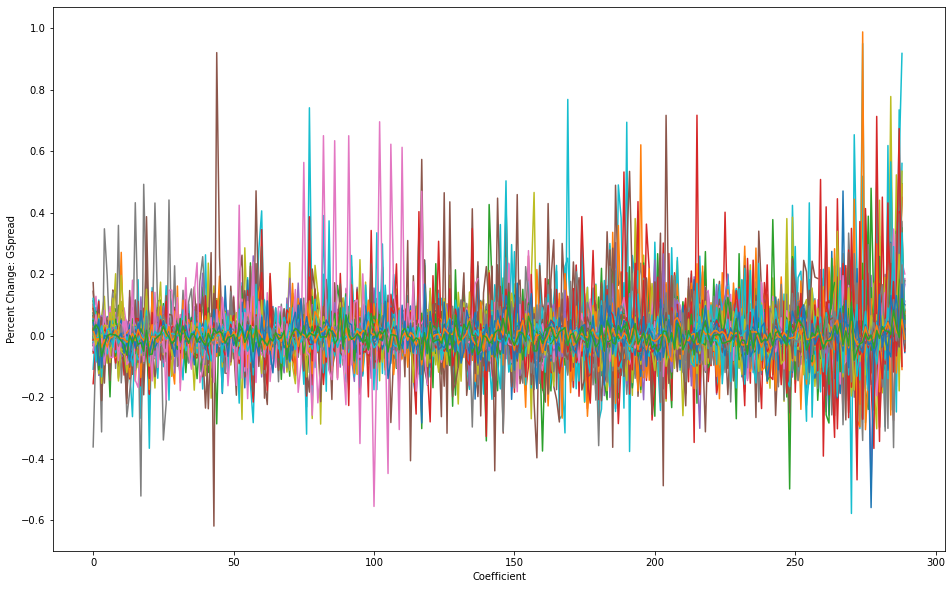

Removed Securities [3614, 17457, 19624, 39416, 171, 19139, 5850, 222, 48865, 6388, 3921, 8542](12) out of total 235


In [126]:
import pywt
from matplotlib.pyplot import figure

cluster_9 = dfs_by_cluster[9]
all_securities = set(cluster_9['SecurityID'])
sec_removed = []

for s in all_securities:
    try:
        data = df_all[df_all['SecurityID'] == s].GSpread.pct_change().dropna().values

        if (max(abs(data)) > cluster_outlier):
            sec_removed.append(s)
            continue
        else:
            pass

        coeffs = pywt.wavedec(data, 'db1', level=0)
        plt.plot(coeffs[0])
    except:
        pass
    
plt.rcParams["figure.figsize"] = (16,10)
plt.xlabel('Coefficient')
plt.ylabel('Percent Change: GSpread')
plt.show()
print(f'Removed Securities {sec_removed}({len(sec_removed)}) out of total {len(all_securities)}')

In [29]:
import os
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [30]:
# Adding 3 separate columns for year, month, and day
df_all['year'] = df_all.index.year
df_all['month'] = df_all.index.month
df_all['day'] = df_all.index.day

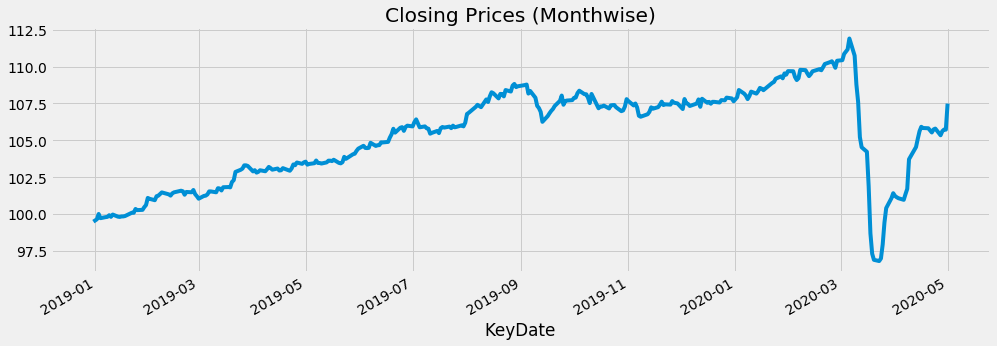

In [33]:
temp=df_all.groupby(['KeyDate'])['Price'].mean() 
temp.plot(figsize=(15,5), title= 'Closing Prices (Monthwise)', fontsize=14)

In [71]:
# Dickey-Fuller test


def test_stationarity(timeseries):
    adft = adfuller(timeseries,autolag='AIC')
 
 # output for dft will give us without defining what the values are.
 # hence we manually write what values does it explains using a for loop

    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] = values

    return output



df_final = pd.DataFrame(columns = ['Test Statistics','p-value','No. of lags used',
                                   'Number of observations used','SecurityID',
                                  'critical value (1%)','critical value (5%)','critical value (10%)'])
data = []

for i, r in df_securities_US_w_avg_rating.iterrows():

    df_sec_timeseries_metrics = df_all.loc[df_all['SecurityID'] == r['SecurityID']]
    if len(df_sec_timeseries_metrics) < 4:
        continue
    output = test_stationarity(df_sec_timeseries_metrics['GSpread'])
    output['SecurityID'] = r['SecurityID']

    data.append(output)

#     if i == 5: 
#         break

df_final = df_final.append(data, True)

print(df_final.head())
print(df_final.info())

   Test Statistics   p-value  No. of lags used  Number of observations used  SecurityID  critical value (1%)  critical value (5%)  critical value (10%)
0        -1.421570  0.571893              15.0                        319.0        64.0            -3.451017            -2.870643             -2.571620
1        -2.733184  0.068470               1.0                        333.0        82.0            -3.450141            -2.870259             -2.571415
2        -0.292077  0.926619              17.0                        316.0        83.0            -3.451215            -2.870730             -2.571666
3        -1.893283  0.335228              14.0                        319.0        87.0            -3.451017            -2.870643             -2.571620
4        -1.752967  0.404049               2.0                        331.0        95.0            -3.450262            -2.870312             -2.571443
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12155 entries, 0 to 12154
Data columns

In [72]:
df_final.to_csv(r'C:\Users\mbrag\PycharmProjects\RPIA-Capstone\Time-Series-Features-US-Securites.csv')